<h1><b><i>PREDICTION OF LEAD SCORE FROM APEX PAGE INFORMATION</i></b>
<p>
The data we are analysing contains the information of visits of customers on our client Medico's website and other media platforms. 
We are building an algorithm based on this data to find the potential customers who are interested in buying the products offered by Medico.
</p>


<h1><b><i>This notebook will contain:</i></b>


*   Connecting snowflake instance with python
*   Required modules for performing data analysis in python
*   Creating the visualization using Autoviz and Sweetviz
*   Creating different plots on lead_score and status and Visualization in different type of plots with respect to different constarints
*   Creating different plots on lead_score and pardot_score and Visualization in different type of plots with respect to different constarints
*   Finding the sum of numeric columns with respect to billing countries
*   Grouping billing countries whose lead_score is greater than 50K
*   Visualization top billing countries in different type of plots with respect to pardot score, lead score, account rating etc.





**Installing connector**



* Installing the python connector for snowflake

* Installing pandas library

In [81]:
!pip install snowflake-connector-python
!pip install "snowflake-connector-python[pandas]"
!pip install "snowflake-connector-python[secure-local-storage,pandas]"

**Summary**


Snowflake Connector Installed

**Importing the connector**

In [82]:
# Importing the connector for snowflake
import snowflake.connector

<b>Connecting to the Snowflake instance</b>



*   Defining the connection parameters
*   Fetching the data from Snowflake
*   Storing the data in dataframe

In [83]:
# Connection to snowflake instance
ctx = snowflake.connector.connect(
    user='yuktha',
    password='Kipi@100',
    account='lo95007.ap-south-1.aws',
    warehouse="data_science_wh",
    database="development",
    schema="apex",
    role="data_scientist"
    )

cs = ctx.cursor()

# import the dataset from snowflake 
sql = "select * from lead_score"
cs.execute(sql)

# Fetch the result set from the cursor and deliver it as the Pandas DataFrame.
df = cs.fetch_pandas_all()

**Summary**



1.   Connected to snowflake
2.   Fetched the data from snowflake and stored it in dataframe

<b>Displaying the top 5 rows of dataframe</b>

In [84]:
df.head()

STATUS                                  DEPARTMENT  ...  PARDOT_SCORE LEAD_SCORE
0  Closed  Protein Expression & Modification Division  ...           NaN        184
1  Closed                                        None  ...           NaN         14
2    Open  Protein Expression & Modification Division  ...         121.0         96
3  Closed                                        None  ...          39.0        176
4    Open                                        None  ...           NaN         20

[5 rows x 17 columns]

**Summary**

Displaying data set

<b>Installing AutoViz library and xlrd module</b>

In [85]:
!pip install git+git://github.com/AutoViML/AutoViz.git
!pip install xlrd

  Cloning git://github.com/AutoViML/AutoViz.git to /tmp/pip-req-build-0fbpfwff
  Running command git clone -q git://github.com/AutoViML/AutoViz.git /tmp/pip-req-build-0fbpfwff
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Summary**

Installation complete

**Importing natural language toolkit**

In [86]:
import nltk

<b>Downloading packages from natural language toolkit</b>

*   punkt is a sentence tokenizer
*   wordnet is a lexical database





In [87]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True




*   Autoviz takes data as input and finds the basic structure and identifies impactful features to plot visualizations.
*   Passing dataframe to autoviz for plotting.



Shape of your Data Set loaded: (98921, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    16 Predictors classified...
        1 variables removed since they were ID or low-information variables
    List of variables removed: ['USER_TYPE']

################ Regression VISUALIZATION Started #####################
Data Set Shape: 98921 rows, 16 cols
Data Set columns info:
* STATUS: 0 nulls, 3 unique vals, most common: {'Closed': 33069, 'Open': 32939}
* DEPARTMENT: 69416 nulls, 4 uniq

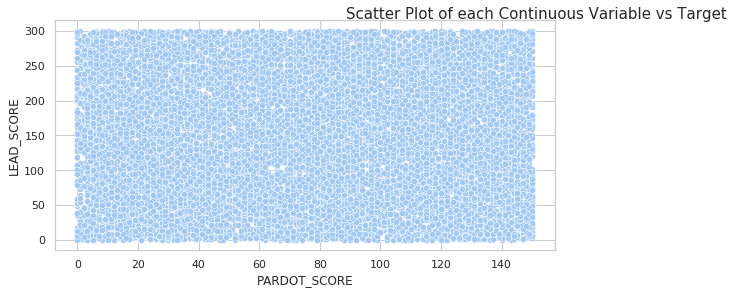

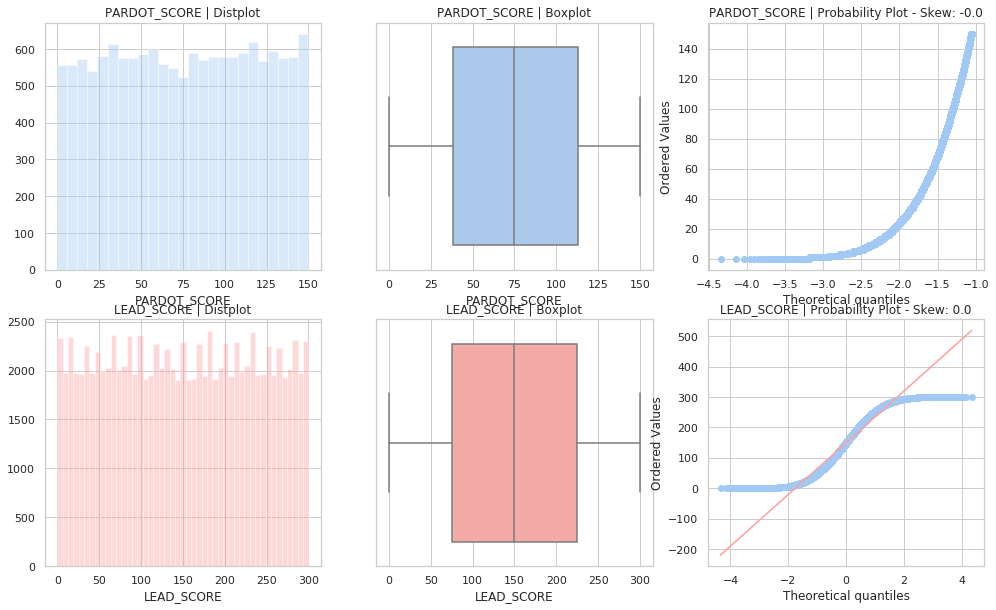

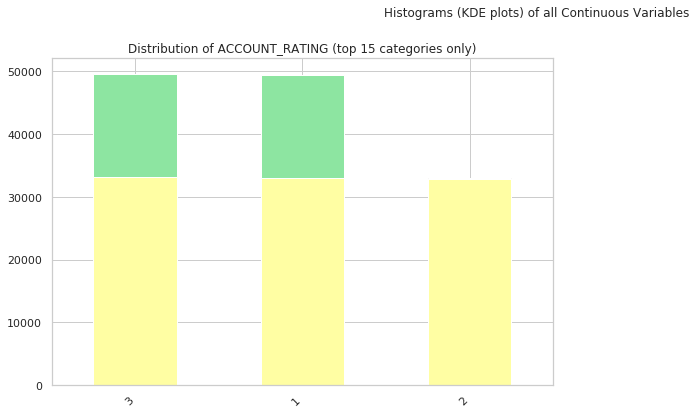

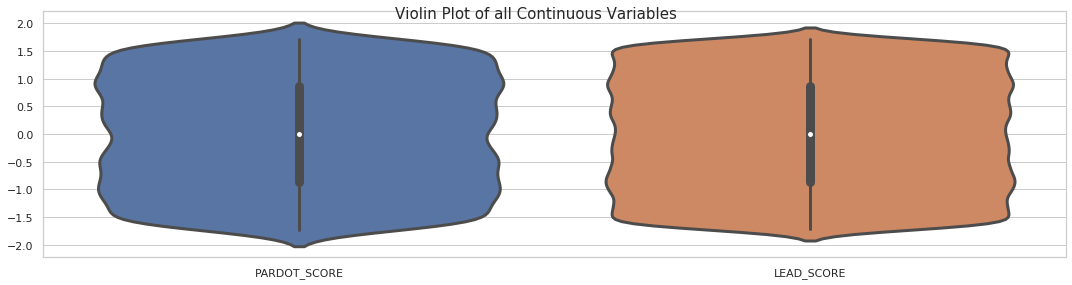

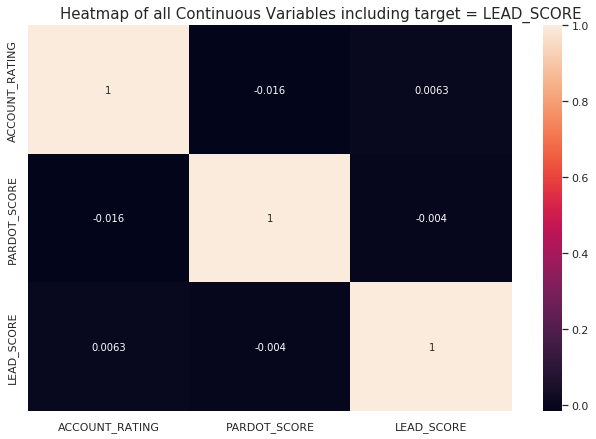

Could not draw Pivot Charts against Dependent Variable


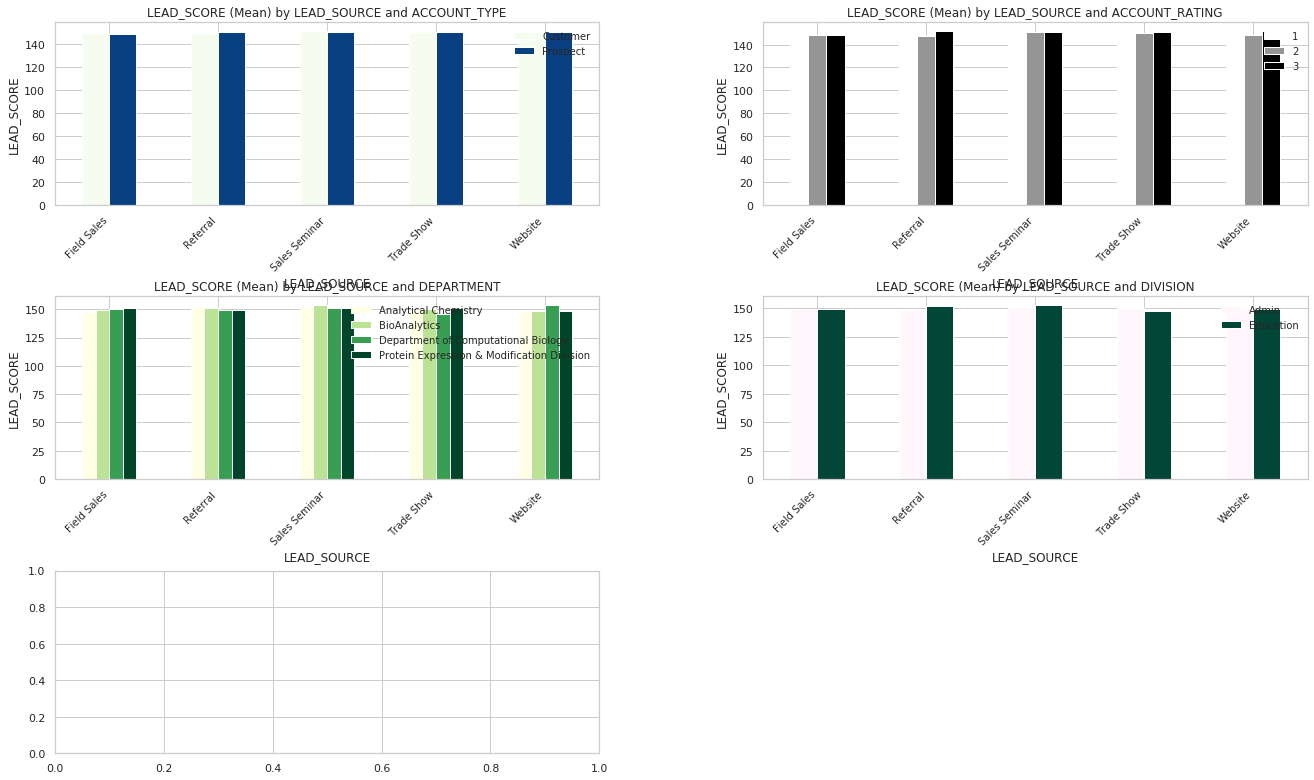

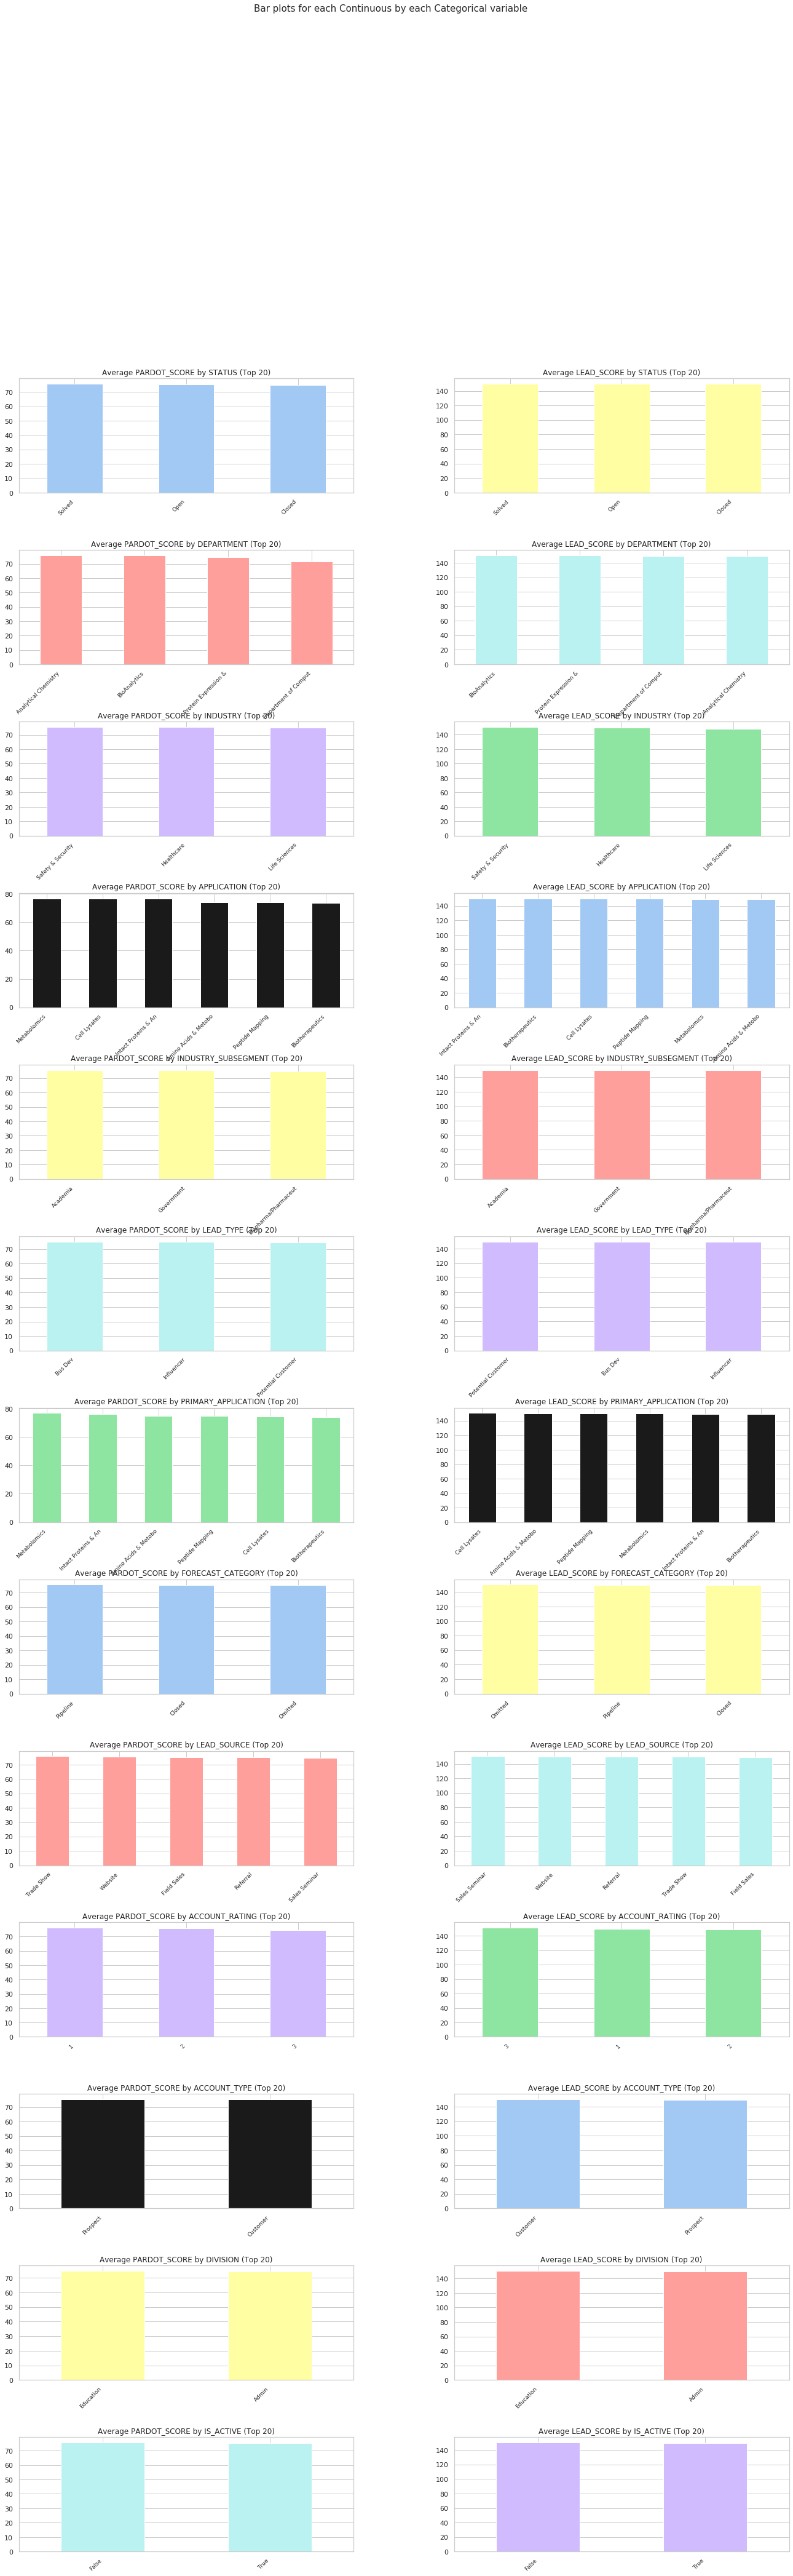

All Plots done


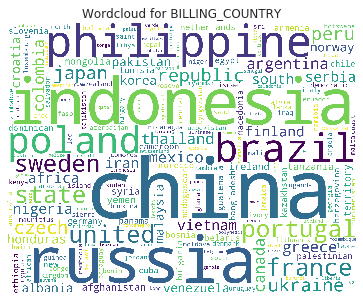

Time to run AutoViz = 77 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [88]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dftc = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='LEAD_SCORE', 
    dfte=df, 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000,
    max_cols_analyzed=30
)

**Summary**

Creating Visualization

**Installing sweetviz**

In [89]:
!pip install sweetviz

**Installing matplotlib**

In [90]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.36 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Importing sweetviz and generating the visualizations and downloading the generated visualizations.**

In [91]:
import sweetviz
from google.colab import files
my_report  = sweetviz.analyze([df,'Train'], target_feat='LEAD_SCORE')
my_report.show_html('FinalReport.html')
files.download('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Summary**

Visualization created and downloaded.

**Importing packages**



*   Importing basic libraries like pandas and numpy
*   Importing visualization libraries
*   Importing machine learning libraries






In [92]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib notebook

**Shows the information of the columns in dataframe**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98921 entries, 0 to 347
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATUS               98921 non-null  object 
 1   DEPARTMENT           29505 non-null  object 
 2   ACCOUNT_RATING       98921 non-null  int8   
 3   ACCOUNT_TYPE         98921 non-null  object 
 4   BILLING_COUNTRY      98921 non-null  object 
 5   DIVISION             29505 non-null  object 
 6   INDUSTRY             98921 non-null  object 
 7   APPLICATION          98921 non-null  object 
 8   INDUSTRY_SUBSEGMENT  98921 non-null  object 
 9   LEAD_TYPE            68630 non-null  object 
 10  PRIMARY_APPLICATION  98921 non-null  object 
 11  USER_TYPE            98921 non-null  object 
 12  FORECAST_CATEGORY    98921 non-null  object 
 13  IS_ACTIVE            98921 non-null  bool   
 14  LEAD_SOURCE          98921 non-null  object 
 15  PARDOT_SCORE         14460 non-null  f

**Summary**

Shows the column names, datatype and number of non-null values in the column

**Displaying the data description of numerical data in dataframe**

In [94]:
df.describe()

ACCOUNT_RATING  PARDOT_SCORE    LEAD_SCORE
count    98921.000000   14460.00000  98921.000000
mean         2.000546      75.24184    149.825588
std          0.817358      43.43460     86.952540
min          1.000000       0.00000      0.000000
25%          1.000000      38.00000     75.000000
50%          2.000000      75.00000    150.000000
75%          3.000000     113.00000    225.000000
max          3.000000     150.00000    300.000000

**Description of all the object type data of dataframe**

In [95]:
df.describe(include=["O"])

STATUS  ...  LEAD_SOURCE
count    98921  ...        98921
unique       3  ...            5
top     Closed  ...  Field Sales
freq     33069  ...        20000

[4 rows x 13 columns]

**Will make your plot outputs appear and be stored within the notebook.**

In [96]:
%matplotlib inline

**Plot to show the count of distinct status**

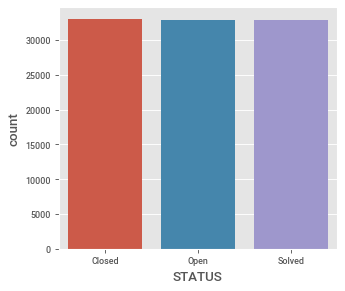

In [97]:
plt.style.use('ggplot')
plt.figure(figsize=(4,4),dpi=80)
sns.countplot(df["STATUS"])

**Summary**

Plot showing the count of 3 distinct values of Status.

<b>Plot to show the colleration between the numeric columns</b> 

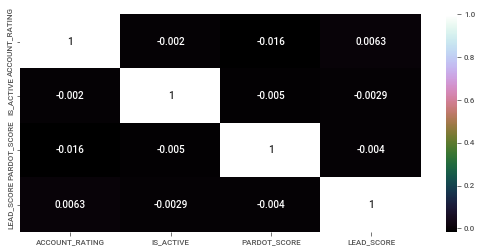

In [98]:
corr = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True,cmap="cubehelix")

**Summary**

Plot shows the correlation between 4 numeric columns of the data all the non numeric columns are ignored

**Plot to compare the lead scores of the different status**

<Figure size 576x288 with 0 Axes>

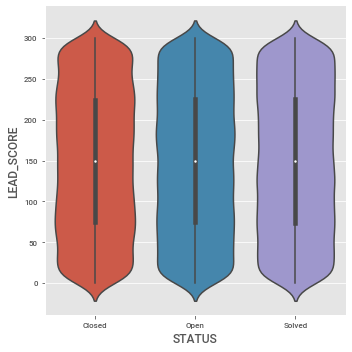

In [99]:
%matplotlib inline
plt.figure(figsize=(8,4))
sns.catplot(x="STATUS",y="LEAD_SCORE",data=df,kind="violin")

**Summary**

Plot Shows the density of different types of cases at different lead score

**Plot to compare lead score of different departments**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 1152x864 with 0 Axes>

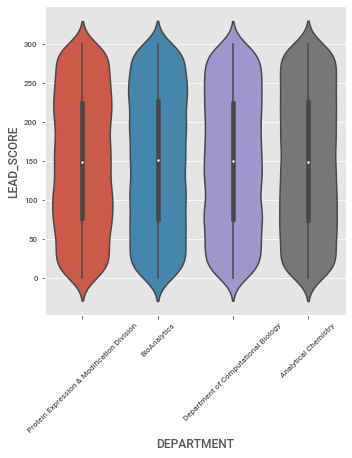

In [100]:
%matplotlib inline
plt.figure(figsize=(16,12))
sns.catplot(x="DEPARTMENT",y="LEAD_SCORE",data=df,kind="violin")
plt.xticks(rotation=45)

**Summary**


Plot shows the density of 4 different departments along the lead score.

**Plot to compare the lead types depending on lead source and lead score**

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 720x432 with 0 Axes>

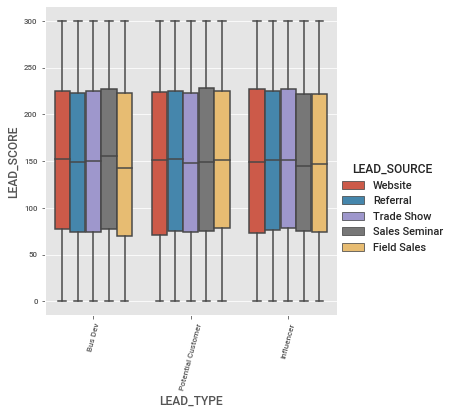

In [101]:
plt.figure(figsize=(10,6))
sns.catplot(x="LEAD_TYPE",y="LEAD_SCORE",data=df,kind="box",hue="LEAD_SOURCE")
plt.xticks(rotation=75)

**Summary**


Plot shows the different lead scores of different lead types with reference to lead source

**Plot to show the status across the departments**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 720x432 with 0 Axes>

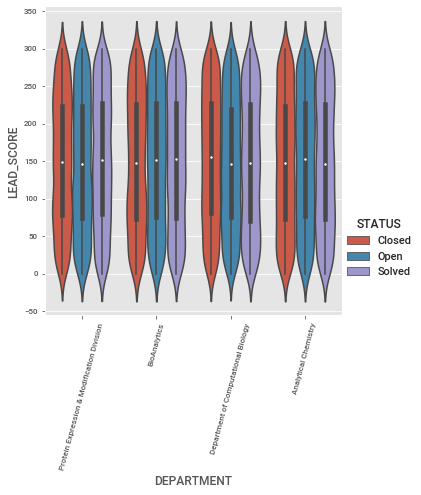

In [102]:
plt.figure(figsize=(10,6))
sns.catplot(x="DEPARTMENT",y="LEAD_SCORE",data=df,kind="violin",hue="STATUS")
plt.xticks(rotation=75)

**Summary**

Plot shows the density of status across the departments along the lead score 

**Plot to show lead scores across industry**

In [103]:
fig = px.box(df,y="LEAD_SCORE",x="INDUSTRY_SUBSEGMENT",points="all",color="INDUSTRY")
fig.show()

<b>Summary</b>

Plot shows the  lead score of different industry subsegment with reference to different industries 

**Plot for lead score of status across industry**

In [104]:
fig1 = px.histogram(df, x="LEAD_SCORE", nbins = 25, facet_row="STATUS",facet_col='INDUSTRY',
                    color="STATUS")
fig1.show()

<b>Summary</b>

Plot shows the count of diffrent status across the Industry along the lead score

**Plot to show count of different status in different industry with respect to lead and pardot score**

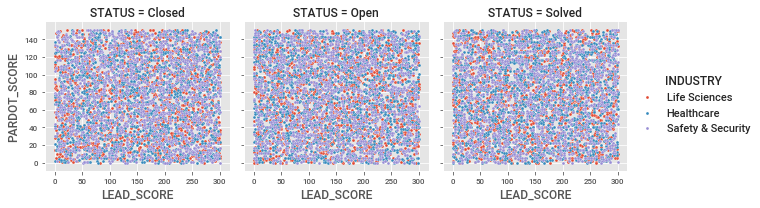

In [105]:
g = sns.FacetGrid(df, col="STATUS", hue="INDUSTRY")
g.map_dataframe(sns.scatterplot, x="LEAD_SCORE", y="PARDOT_SCORE")
g.add_legend()

<b>Summary</b>

Plot shows the count of different status for different  Industry across the lead score and pardot score

**Plot to show count of different lead type in different industry with respect to lead and pardot score**

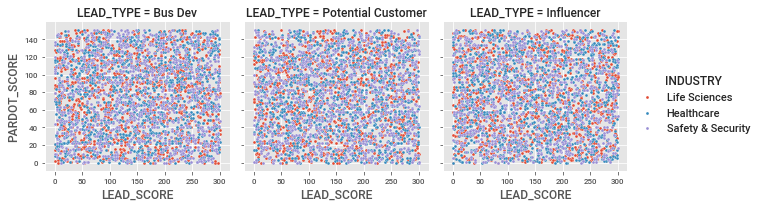

In [106]:
g = sns.FacetGrid(df, col="LEAD_TYPE", hue="INDUSTRY")
g.map_dataframe(sns.scatterplot, x="LEAD_SCORE", y="PARDOT_SCORE")
g.add_legend()

<b>Summary</b>

Plot shows the count of different lead type for different Industry across the lead score and pardot score

**Plot for showing the density of industry across lead and pardot score**

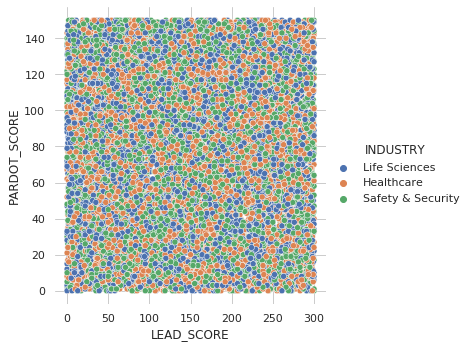

In [107]:
import seaborn as sns
sns.set_theme(style="whitegrid")


#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="LEAD_SCORE", y="PARDOT_SCORE",
    hue="INDUSTRY",
    sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

**Summary**

Plot shows the density of industry across lead and pardot score

<b>Plot for showing the density of applications across lead and pardot score</b>

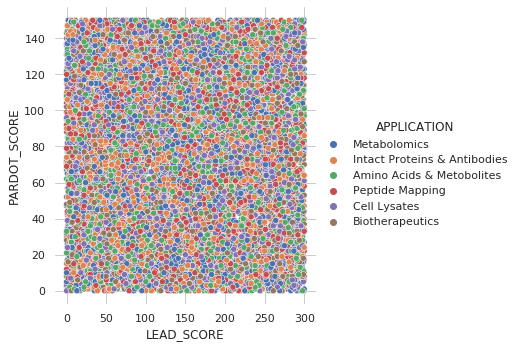

In [108]:
import seaborn as sns
sns.set_theme(style="whitegrid")


#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="LEAD_SCORE", y="PARDOT_SCORE",
    hue="APPLICATION",
    sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

Plot  shows the density of applications across lead and pardot score

**Creating the sum of numeric values across distinct billing countries**

In [109]:
def df_group(data,column):
  grouped_df = data.groupby(by=column).sum()
  print(grouped_df.head())
  grouped_df = grouped_df.reset_index()
  sns.set_color_codes("pastel")
  sns.barplot(x="LEAD_SCORE", y=column, data=grouped_df.sort_values(by="LEAD_SCORE",ascending=False).head(10),
            label="Total", color="b")
  plt.show()


In [110]:
country_df = df.groupby(by="BILLING_COUNTRY").sum()

In [111]:
country_df.head()

ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
BILLING_COUNTRY                                                     
Afghanistan               921.0        202        4522.0     66237.0
Aland Islands              44.0         10          85.0      3431.0
Albania                   916.0        246        5497.0     72300.0
Algeria                     5.0          0           0.0       601.0
American Samoa             54.0         15         100.0      3577.0

**Summary**

Showing the sum of 4 numeric columns across first 5 billing countries

**Setting index**

In [112]:
country_df = country_df.reset_index()

**Displaying the top 5 rows after setting the index**

In [113]:
country_df.head()

BILLING_COUNTRY  ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
0     Afghanistan           921.0        202        4522.0     66237.0
1   Aland Islands            44.0         10          85.0      3431.0
2         Albania           916.0        246        5497.0     72300.0
3         Algeria             5.0          0           0.0       601.0
4  American Samoa            54.0         15         100.0      3577.0

**Sorting the data by lead_score**

In [114]:
country_df.sort_values(by="LEAD_SCORE")

BILLING_COUNTRY  ACCOUNT_RATING  ...  PARDOT_SCORE  LEAD_SCORE
215                 Tokelau             2.0  ...           0.0         5.0
155                    Niue             3.0  ...           0.0        76.0
205  Svalbard and Jan Mayen             5.0  ...           0.0       157.0
48             Cook Islands             3.0  ...           0.0       179.0
177        Saint Barthelemy             3.0  ...           0.0       180.0
..                      ...             ...  ...           ...         ...
29                   Brazil          7566.0  ...       43529.0    567822.0
167             Philippines         10618.0  ...       58482.0    789830.0
175                  Russia         11323.0  ...       65132.0    858729.0
96                Indonesia         21108.0  ...      115479.0   1579304.0
43                    China         36303.0  ...      197367.0   2714134.0

[239 rows x 5 columns]

**Fetching the countries whose lead score is greater than 50k**

In [115]:
country_df_50k = country_df[country_df["LEAD_SCORE"]>50000]

In [116]:
country_df_50k.head()

BILLING_COUNTRY  ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
0      Afghanistan           921.0        202        4522.0     66237.0
2          Albania           916.0        246        5497.0     72300.0
9        Argentina          2849.0        752       15601.0    216195.0
10         Armenia           762.0        185        4024.0     57237.0
19         Belarus           677.0        151        3764.0     50495.0

**Summary**

Displaying the countries whose lead score is greater than 50k

**Ploting the  top 10 countries whose lead score is greater than 50k**

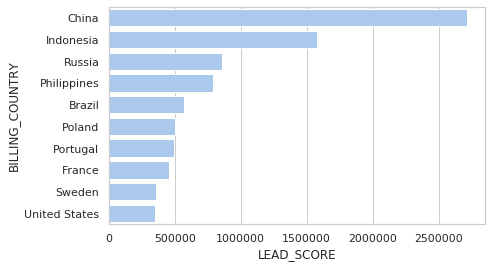

In [117]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="LEAD_SCORE", y="BILLING_COUNTRY", data=country_df_50k.sort_values(by="LEAD_SCORE",ascending=False).head(10),
            label="Total", color="b")

**Summary**

Displaying the top 10 countries with respect to lead_score

**Plot to show the numeric columns of data for all billing countries whose lead score is greater than 50k**

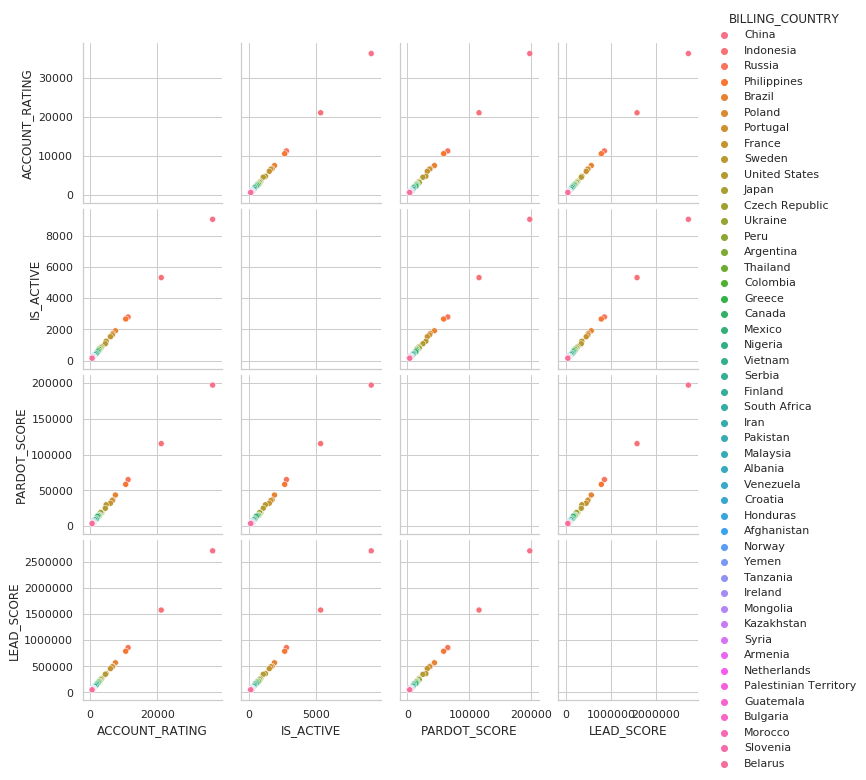

In [118]:
sns.pairplot(country_df_50k.sort_values(by="LEAD_SCORE",ascending=False), hue="BILLING_COUNTRY")

**Plot showing the density of lead score**

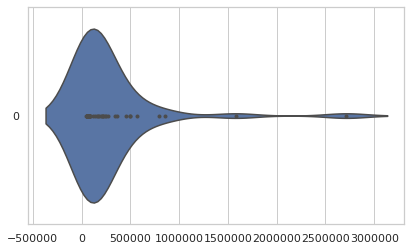

In [119]:
sns.violinplot(data=country_df_50k["LEAD_SCORE"],inner="points", orient="h")

**Summary**

Plot shows that the countries with lead score below 50000 is higher

**Plot showing the account rating**

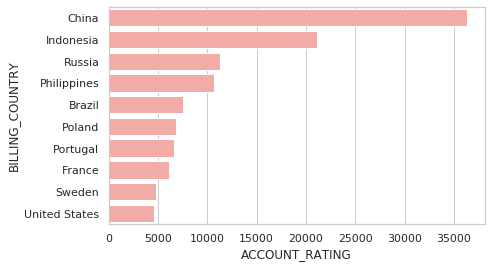

In [120]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="ACCOUNT_RATING", y="BILLING_COUNTRY", data=country_df_50k.sort_values(by="ACCOUNT_RATING",ascending=False).head(10),
            color="r")

**Summary**

Plot shows the countries with top account rating

<b>Plot to compare the pardot score</b> 

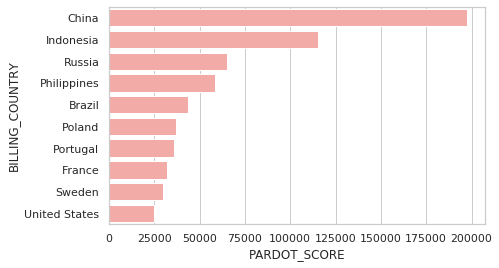

In [121]:
sns.set_color_codes("pastel")
sns.barplot(x="PARDOT_SCORE", y="BILLING_COUNTRY", data=country_df_50k.sort_values(by="PARDOT_SCORE",ascending=False).head(10),
            color="r")

**Summary**

Plot compares the pardot scores of the 10 countries with highest pardot score in which china is at the top with hightest pardot score.

In [122]:
df.head()

STATUS                                  DEPARTMENT  ...  PARDOT_SCORE LEAD_SCORE
0  Closed  Protein Expression & Modification Division  ...           NaN        184
1  Closed                                        None  ...           NaN         14
2    Open  Protein Expression & Modification Division  ...         121.0         96
3  Closed                                        None  ...          39.0        176
4    Open                                        None  ...           NaN         20

[5 rows x 17 columns]

## Distribution of Lead score in different sector

                   ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
INDUSTRY                                                              
Healthcare                66329.0      16602      363920.0   4981528.0
Life Sciences             65935.0      16451      368053.0   4907384.0
Safety & Security         65632.0      16387      356024.0   4931985.0


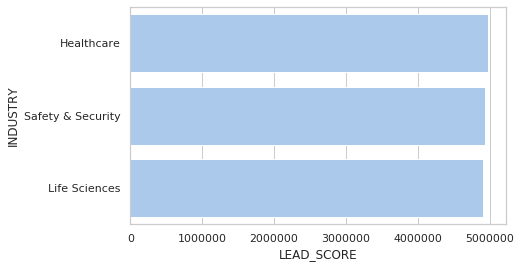

In [123]:
df_group(df,"INDUSTRY")

                 ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
BILLING_COUNTRY                                                     
Afghanistan               921.0        202        4522.0     66237.0
Aland Islands              44.0         10          85.0      3431.0
Albania                   916.0        246        5497.0     72300.0
Algeria                     5.0          0           0.0       601.0
American Samoa             54.0         15         100.0      3577.0


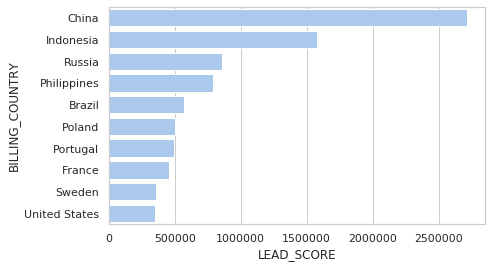

In [124]:
df_group(df,"BILLING_COUNTRY")

                              ACCOUNT_RATING  ...  LEAD_SCORE
APPLICATION                                   ...            
Amino Acids & Metobolites            32847.0  ...   2452773.0
Biotherapeutics                      32956.0  ...   2478979.0
Cell Lysates                         33398.0  ...   2497571.0
Intact Proteins & Antibodies         32990.0  ...   2482286.0
Metabolomics                         33018.0  ...   2464185.0

[5 rows x 4 columns]


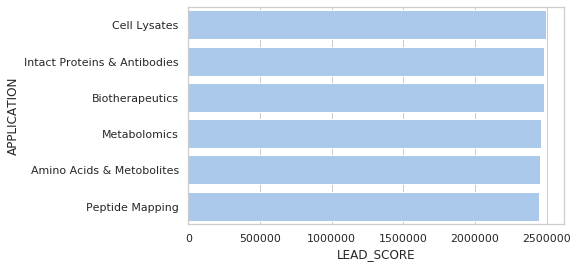

In [125]:
df_group(df,"APPLICATION")

                           ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
INDUSTRY_SUBSEGMENT                                                           
Academia                          66435.0      16574      365023.0   4970189.0
Biopharma/Pharmaceuticals         66115.0      16502      363750.0   4945805.0
Government                        65346.0      16364      359224.0   4904903.0


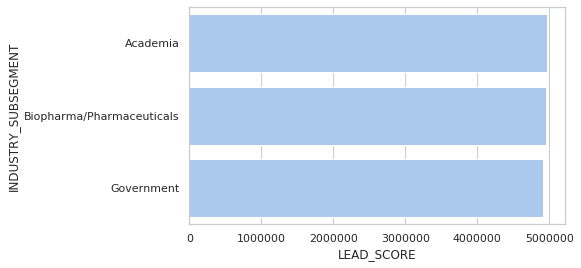

In [126]:
df_group(df,"INDUSTRY_SUBSEGMENT")

                    ACCOUNT_RATING  IS_ACTIVE  PARDOT_SCORE  LEAD_SCORE
LEAD_TYPE                                                              
Bus Dev                    46133.0      11509      256330.0   3447053.0
Influencer                 45546.0      11390      247501.0   3412237.0
Potential Customer         45759.0      11453      247215.0   3415888.0


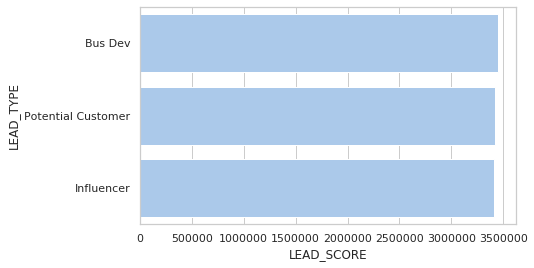

In [127]:
df_group(df,"LEAD_TYPE")

## ScatterPlot Between Pardot and Lead Score

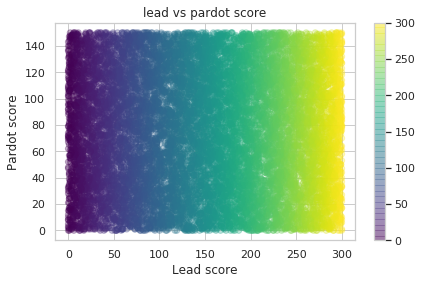

In [128]:
plt.scatter(df["LEAD_SCORE"],df["PARDOT_SCORE"], c=df["LEAD_SCORE"], alpha=0.3,
            cmap='viridis')
plt.title("lead vs pardot score") #title
plt.xlabel("Lead score") #x label
plt.ylabel("Pardot score") #y label
plt.colorbar();

## PairPlot with some Features

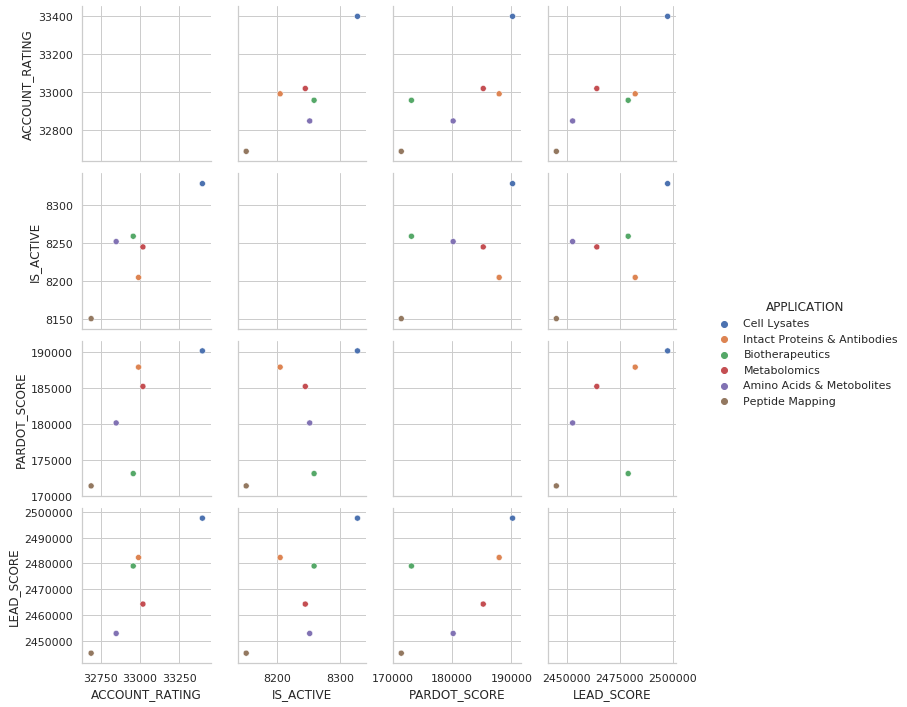

In [129]:
df1 = df.groupby(by="APPLICATION").sum().reset_index()
sns.pairplot(df1.sort_values(by="LEAD_SCORE",ascending=False), hue="APPLICATION")

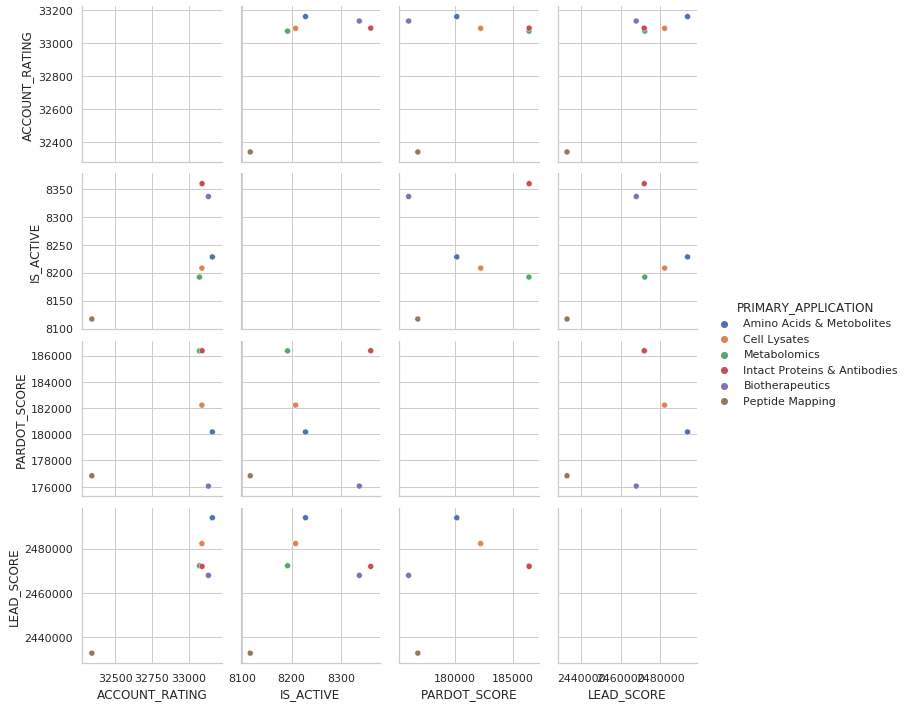

In [130]:
df1 = df.groupby(by="PRIMARY_APPLICATION").sum().reset_index()
sns.pairplot(df1.sort_values(by="LEAD_SCORE",ascending=False), hue="PRIMARY_APPLICATION")

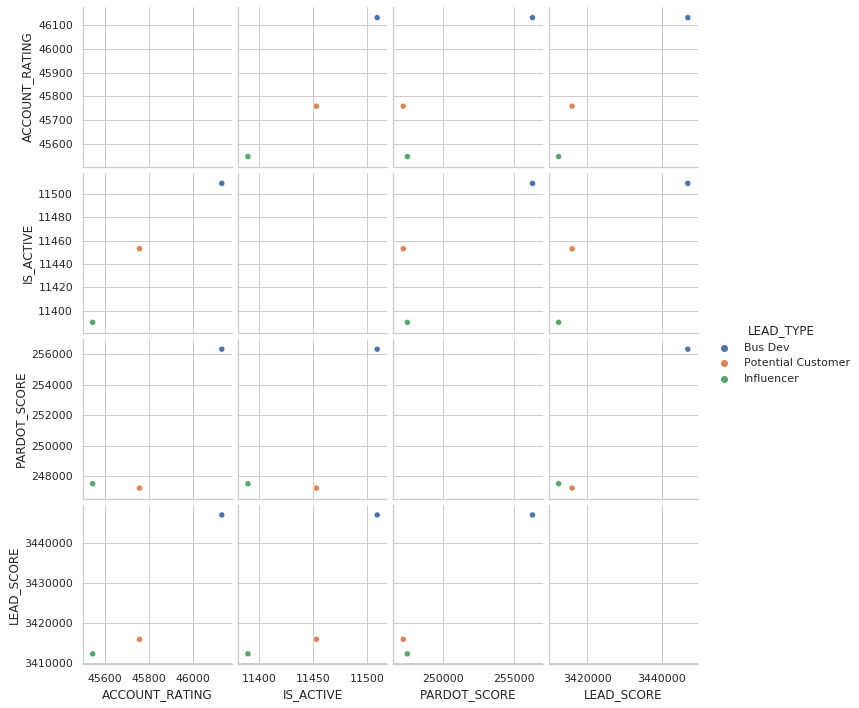

In [131]:
df1 = df.groupby(by="LEAD_TYPE").sum().reset_index()
sns.pairplot(df1.sort_values(by="LEAD_SCORE",ascending=False), hue="LEAD_TYPE")

## Data Cleaning

In [132]:
COLUMNS = ["STATUS","DEPARTMENT","ACCOUNT_RATING","BILLING_COUNTRY","INDUSTRY","APPLICATION","LEAD_TYPE","PARDOT_SCORE","LEAD_SCORE"]

In [133]:
working_df = df[COLUMNS]

In [134]:
working_df.head()

STATUS                                  DEPARTMENT  ...  PARDOT_SCORE LEAD_SCORE
0  Closed  Protein Expression & Modification Division  ...           NaN        184
1  Closed                                        None  ...           NaN         14
2    Open  Protein Expression & Modification Division  ...         121.0         96
3  Closed                                        None  ...          39.0        176
4    Open                                        None  ...           NaN         20

[5 rows x 9 columns]

In [135]:
working_df["STATUS"] = working_df["STATUS"].apply(lambda x: 1 if x=="Open" else 0 )
working_df.head()

STATUS                                  DEPARTMENT  ...  PARDOT_SCORE LEAD_SCORE
0       0  Protein Expression & Modification Division  ...           NaN        184
1       0                                        None  ...           NaN         14
2       1  Protein Expression & Modification Division  ...         121.0         96
3       0                                        None  ...          39.0        176
4       1                                        None  ...           NaN         20

[5 rows x 9 columns]

In [136]:
def billing_country_converter(df):
  if(df["BILLING_COUNTRY"]=="China"):
    return 1
  elif(df["BILLING_COUNTRY"]=="Indonesia"):
    return 2
  elif(df["BILLING_COUNTRY"]=="Russia"):
    return 3
  else:
    return 4

In [137]:
working_df['BILLING_COUNTRY'] = working_df.apply(billing_country_converter, axis = 1)
working_df.head()

STATUS                                  DEPARTMENT  ...  PARDOT_SCORE  LEAD_SCORE
0       0  Protein Expression & Modification Division  ...           NaN         184
1       0                                        None  ...           NaN          14
2       1  Protein Expression & Modification Division  ...         121.0          96
3       0                                        None  ...          39.0         176
4       1                                        None  ...           NaN          20

[5 rows x 9 columns]

In [138]:
working_df = pd.get_dummies(working_df)

In [139]:
working_df.head()

STATUS  ACCOUNT_RATING  ...  LEAD_TYPE_Influencer  LEAD_TYPE_Potential Customer
0       0               3  ...                     0                             0
1       0               3  ...                     0                             0
2       1               2  ...                     0                             1
3       0               2  ...                     0                             0
4       1               3  ...                     1                             0

[5 rows x 21 columns]

In [140]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98921 entries, 0 to 347
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   STATUS                                                 98921 non-null  int64  
 1   ACCOUNT_RATING                                         98921 non-null  int8   
 2   BILLING_COUNTRY                                        98921 non-null  int64  
 3   PARDOT_SCORE                                           14460 non-null  float64
 4   LEAD_SCORE                                             98921 non-null  int16  
 5   DEPARTMENT_Analytical Chemistry                        98921 non-null  uint8  
 6   DEPARTMENT_BioAnalytics                                98921 non-null  uint8  
 7   DEPARTMENT_Department of Computational Biology         98921 non-null  uint8  
 8   DEPARTMENT_Protein Expression & Modification Div

In [141]:
working_df.drop("PARDOT_SCORE",inplace=True,axis=1)

## Lead Score Distribution

Text(0.5, 1.0, 'Distribution of LEAD_SCORE')

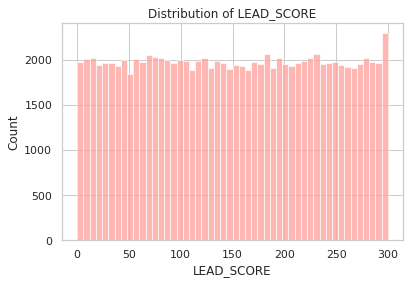

In [142]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(working_df['LEAD_SCORE'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of LEAD_SCORE')


## Model Building

In [156]:
y = working_df["LEAD_SCORE"]
X = working_df.drop("LEAD_SCORE",axis=1)

In [157]:
# Sperate train and test data
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [145]:
X_train.shape,y_train.shape

((79136, 19), (79136, 1))

In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

-0.00039622710832198926

In [159]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(max_depth=2, random_state=0)

model2.fit(X_train, y_train)

model2.score(X_test, y_test)

-0.0001083766837202127

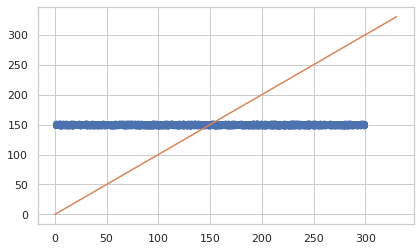

In [160]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

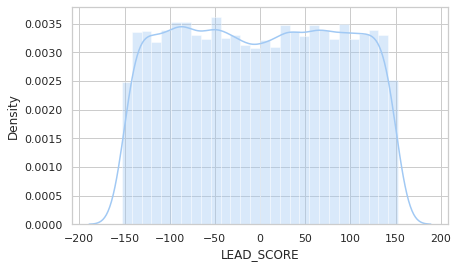

In [161]:


# Check for Residual normality & mean
%matplotlib inline
#ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),color='b')

In [162]:
residual = (y_test - y_pred)

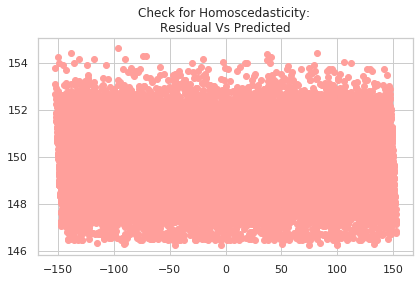

In [163]:
#Check for Homoscedasticity
plt.scatter(residual , y_pred,color='r') 
plt.title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [152]:
!pip install wandb

In [153]:
import wandb

In [168]:
wandb.init(project="visualize-sklearn")

In [169]:
wandb.sklearn.plot_regressor(model,X_train,X_test,y_train,y_test,model_name="Linear")

wandb: 
wandb: Plotting Linear.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: WARNING using only the first 1000 datapoints to create chart outlier_candidates
wandb: Logged outlier candidates.
wandb: WARNING using only the first 100 datapoints to create chart residuals
wandb: WARNING using only the first 100 datapoints to create chart residuals
wandb: Logged residuals.


In [167]:
wandb.sklearn.plot_outlier_candidates(model,X_train,y_train)

wandb: WARNING using only the first 1000 datapoints to create chart outlier_candidates


In [172]:
wandb.sklearn.plot_feature_importances(model)

In [173]:
wandb.sklearn.plot_feature_importances(model2)